# Analysing Covid-19 Geospatial data with Python

In [1]:
from datetime import datetime 
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctxdflfölfd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
#url = "https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv"

#df = pd.read_csv(url)
#df.head()

In [3]:
#df.dtypes

In [4]:
url = 'https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv'
dtypes = {  # bool will return value error because we hav NaN values
    'Date': object,
    'iso3': object,
    'CountryName': object,
    'Region': object,
    'lat': float,
    'lon': float,
    'CumulativePositive': float,
    'CumulativeDeceased': float,
    'CumulativeRecovered': float,
    'CurrentlyPositive': float,
    'Hospitalized': float,
    'IntensiveCare': float,
    'EUcountry': np.bool,
    'EUCPMcountry': np.bool,
    'NUTS': object,
    }

df = pd.read_csv(url, skiprows=range(1, 2), dtype=dtypes)
df.head()


Date iso3      CountryName           Region        lat        lon  \
0  2020-01-22  GRC           Greece    NOT SPECIFIED        NaN        NaN   
1  2020-01-22  ISL          Iceland    NOT SPECIFIED        NaN        NaN   
2  2020-01-22  LIE    Liechtenstein    Liechtenstein  47.164696   9.555000   
3  2020-01-22  MCO           Monaco           Monaco  43.738348   7.424451   
4  2020-01-22  MKD  North Macedonia  North Macedonia  41.611000  21.751417   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  EUCPMcountry  \
0                0.0           NaN            NaN       True          True   
1                0.0           NaN            NaN      False          True   
2                0.0           NaN            NaN      False         False   
3                0.0           NaN            NaN      False         False   
4                0.0           NaN            NaN      False          True   

  NUTS  
0  NaN  
1  NaN  
2   LI  
3   MC  
4   MK

In [5]:
df.tail()

Date iso3 CountryName              Region        lat        lon  \
133450  2021-01-29  DEU     Germany            Saarland  49.384368   6.953135   
133451  2021-01-29  DEU     Germany             Sachsen  51.052334  13.348561   
133452  2021-01-29  DEU     Germany      Sachsen-Anhalt  52.013193  11.700691   
133453  2021-01-29  DEU     Germany  Schleswig Holstein  54.029500   9.705555   
133454  2021-01-29  DEU     Germany           Thüringen  50.903878  11.024880   

        CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
133450             25232.0               720.0                  NaN   
133451            178330.0              6153.0                  NaN   
133452             50945.0              1653.0                  NaN   
133453             35426.0               834.0                  NaN   
133454             64392.0              2122.0                  NaN   

        CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  \
133450            24512.0           NaN            NaN       True   
133451           172177.0           NaN            NaN       True   
133452            49292.0           NaN            NaN       True   
133453            34592.0           NaN            NaN       True   
133454            62270.0           NaN            NaN       True   

        EUCPMcountry NUTS  
133450          True  DEC  
133451          True  DED  
133452          True  DEE  
133453          True  DEF  
133454          True  DEG

In [6]:
df.shape

(133455, 15)

In [7]:
df.describe()

lat            lon  CumulativePositive  CumulativeDeceased  \
count  124740.000000  124740.000000        1.323170e+05       106394.000000   
mean       49.185773      21.552218        1.820859e+04          689.480450   
std         9.323308      26.150401        9.616718e+04         2888.820894   
min       -20.890660     -61.272382       -1.246000e+03            0.000000   
25%        44.244926       8.116991        1.890000e+02            1.000000   
50%        47.417407      17.174810        1.865000e+03           42.000000   
75%        54.928337      26.889951        9.217000e+03          314.000000   
max        94.793040     166.788413        3.106859e+06        90698.000000   

       CumulativeRecovered  CurrentlyPositive  Hospitalized  IntensiveCare  
count         8.986600e+04       1.331730e+05  60714.000000   57952.000000  
mean          1.058690e+04       1.037220e+04    814.748361      87.857071  
std           7.231191e+04       8.361337e+04   3614.047833     358.314878  
min           0.000000e+00      -1.898900e+06      0.000000       0.000000  
25%           0.000000e+00       1.190000e+02      0.000000       0.000000  
50%           1.160000e+02       9.600000e+02      3.000000       0.000000  
75%           4.286000e+03       4.237000e+03    187.000000      16.000000  
max           2.340216e+06       3.106802e+06  57102.000000    4750.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133455 entries, 0 to 133454
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 133455 non-null  object 
 1   iso3                 133455 non-null  object 
 2   CountryName          133455 non-null  object 
 3   Region               133455 non-null  object 
 4   lat                  124740 non-null  float64
 5   lon                  124740 non-null  float64
 6   CumulativePositive   132317 non-null  float64
 7   CumulativeDeceased   106394 non-null  float64
 8   CumulativeRecovered  89866 non-null   float64
 9   CurrentlyPositive    133173 non-null  float64
 10  Hospitalized         60714 non-null   float64
 11  IntensiveCare        57952 non-null   float64
 12  EUcountry            133455 non-null  bool   
 13  EUCPMcountry         133455 non-null  bool   
 14  NUTS                 126379 non-null  object 
dtypes: bool(2), float

In [9]:
df["Date"].max(), df["Date"].min()

('2021-01-29', '2020-01-22')

## Geodataframe

In [10]:
df.dropna(axis=0, subset=["lat","lon"], inplace=True)

In [13]:
crs="EPSG:4326"

In [11]:
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df.lon, df.lat))
gdf.head()

Date iso3      CountryName           Region        lat        lon  \
2  2020-01-22  LIE    Liechtenstein    Liechtenstein  47.164696   9.555000   
3  2020-01-22  MCO           Monaco           Monaco  43.738348   7.424451   
4  2020-01-22  MKD  North Macedonia  North Macedonia  41.611000  21.751417   
5  2020-01-22  SMR       San Marino       San Marino  43.942973  12.460035   
6  2020-01-22  SRB           Serbia           Serbia  44.206802  20.911009   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   
5                 0.0                 0.0                  0.0   
6                 0.0                 0.0                  0.0   

   CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  EUCPMcountry  \
2                0.0           NaN            NaN      False         False   
3                0.0           NaN            NaN      False         False   
4                0.0           NaN            NaN      False          True   
5                0.0           NaN            NaN      False         False   
6                0.0           NaN            NaN      False          True   

  NUTS                   geometry  
2   LI   POINT (9.55500 47.16470)  
3   MC   POINT (7.42445 43.73835)  
4   MK  POINT (21.75142 41.61100)  
5   SM  POINT (12.46003 43.94297)  
6  NaN  POINT (20.91101 44.20680)

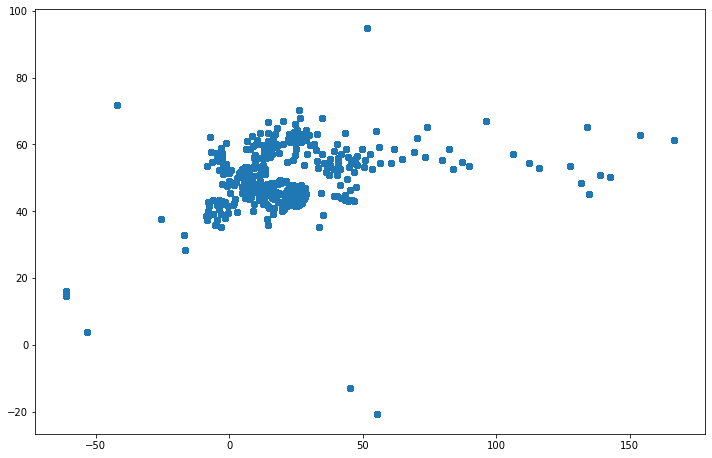

In [12]:
gdf.plot(figsize=(12,10));

In [18]:
gdf[gdf["Date"] == '2020-03-30'].head()

Date iso3 CountryName   Region        lat        lon  \
6726  2020-03-30  ALB     Albania    Berat  40.628500  20.090775   
6727  2020-03-30  ALB     Albania   Durrës  41.518365  19.651766   
6728  2020-03-30  ALB     Albania  Elbasan  41.040028  20.186454   
6729  2020-03-30  ALB     Albania     Fier  40.774633  19.620528   
6730  2020-03-30  ALB     Albania    Korçë  40.628830  20.666004   

      CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
6726                 1.0                 0.0                  0.0   
6727                19.0                 1.0                  0.0   
6728                 5.0                 0.0                  0.0   
6729                27.0                 2.0                  0.0   
6730                14.0                 0.0                  0.0   

      CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  EUCPMcountry  \
6726                1.0           0.0            0.0      False         False   
6727               18.0           0.0            0.0      False         False   
6728                5.0           0.0            0.0      False         False   
6729               25.0           0.0            0.0      False         False   
6730               14.0           0.0            0.0      False         False   

       NUTS                   geometry  
6726  AL031  POINT (20.09078 40.62850)  
6727  AL012  POINT (19.65177 41.51837)  
6728  AL021  POINT (20.18645 41.04003)  
6729  AL032  POINT (19.62053 40.77463)  
6730  AL034  POINT (20.66600 40.62883)

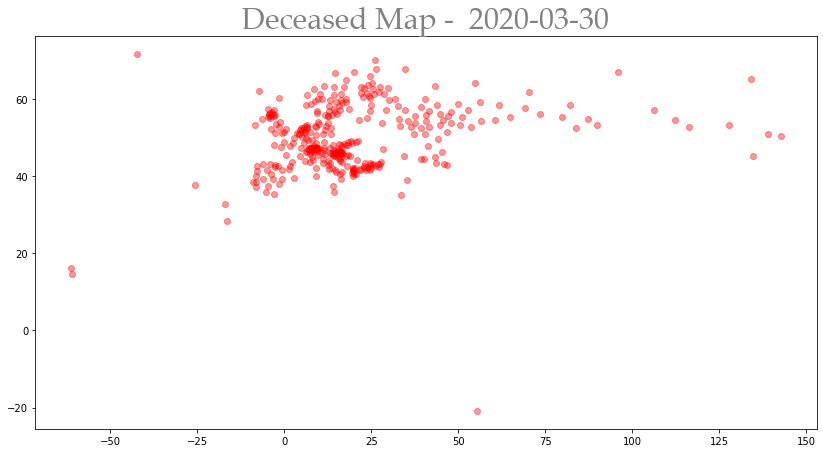

In [17]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["Date"] == '2020-03-30'].plot(ax=ax, color="red", alpha=.4)
plt.title("Deceased Map -  2020-03-30", fontsize=30, fontname="Palatino Linotype", color="grey")

plt.show()

## Plotting Maps 

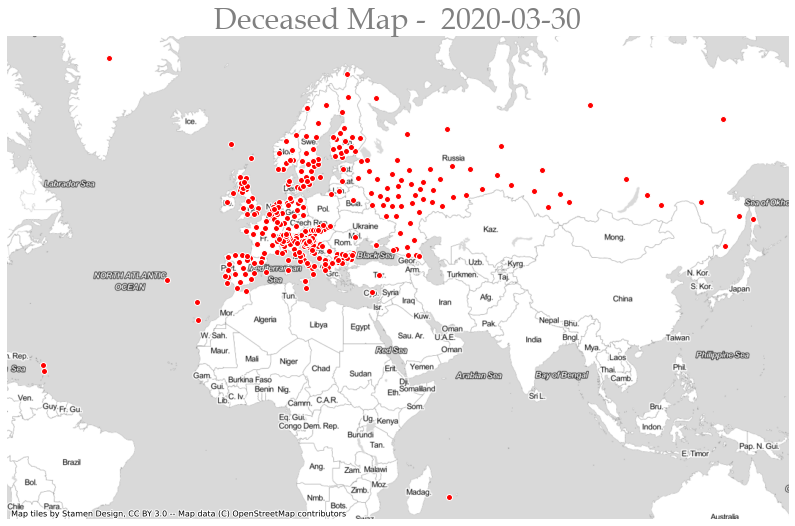

In [20]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["Date"] == '2020-03-30'].to_crs(epsg=3857).plot(ax=ax, color="red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 
plt.title("Deceased Map -  2020-03-30", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

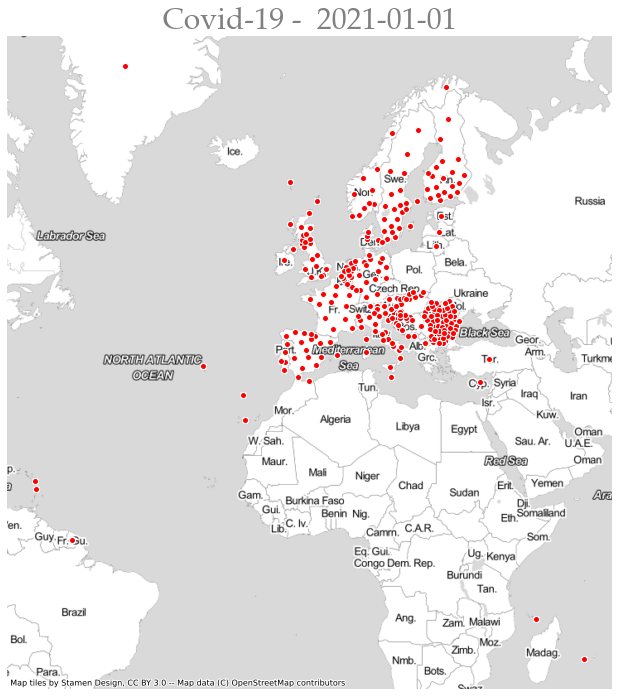

In [21]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["EUCPMcountry"] == True].to_crs(epsg=3857).plot(ax=ax, color="red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 
plt.title(" Covid-19 -  2021-01-01 ", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

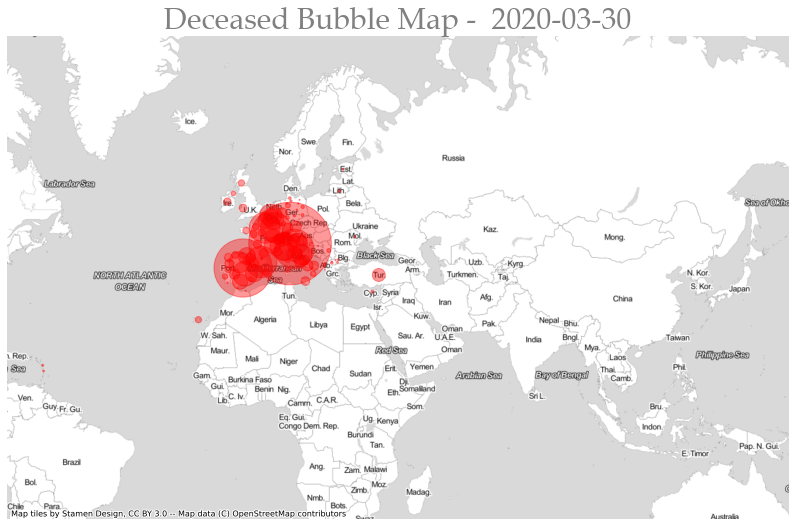

In [26]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["Date"] == '2020-03-30'].to_crs(epsg=3857).plot(ax=ax, color="red", alpha=.4,  markersize="CumulativeDeceased")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 
plt.title("Deceased Bubble Map -  2020-03-30", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

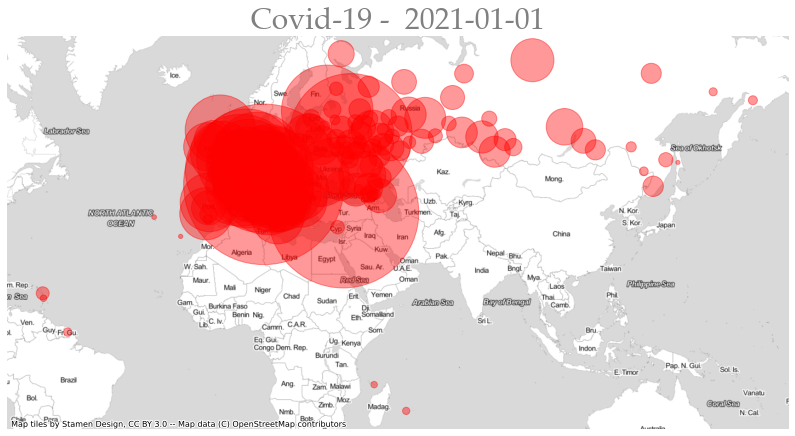

In [30]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["Date"] == '2021-01-10'].to_crs(epsg=3857).plot(ax=ax, color="red", alpha=.4,  markersize="CumulativeDeceased")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 
plt.title(" Covid-19 -  2021-01-01 ", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

In [27]:
gdf["Normalized_mean_death"]=((gdf["CumulativeDeceased"]-gdf["CumulativeDeceased"].min())/(gdf["CumulativeDeceased"].max()-gdf["CumulativeDeceased"].min()))*100

In [28]:
gdf.head()

Date iso3      CountryName           Region        lat        lon  \
2  2020-01-22  LIE    Liechtenstein    Liechtenstein  47.164696   9.555000   
3  2020-01-22  MCO           Monaco           Monaco  43.738348   7.424451   
4  2020-01-22  MKD  North Macedonia  North Macedonia  41.611000  21.751417   
5  2020-01-22  SMR       San Marino       San Marino  43.942973  12.460035   
6  2020-01-22  SRB           Serbia           Serbia  44.206802  20.911009   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   
5                 0.0                 0.0                  0.0   
6                 0.0                 0.0                  0.0   

   CurrentlyPositive  Hospitalized  IntensiveCare  EUcountry  EUCPMcountry  \
2                0.0           NaN            NaN      False         False   
3                0.0           NaN            NaN      False         False   
4                0.0           NaN            NaN      False          True   
5                0.0           NaN            NaN      False         False   
6                0.0           NaN            NaN      False          True   

  NUTS                   geometry  Normalized_mean_death  
2   LI   POINT (9.55500 47.16470)                    0.0  
3   MC   POINT (7.42445 43.73835)                    0.0  
4   MK  POINT (21.75142 41.61100)                    0.0  
5   SM  POINT (12.46003 43.94297)                    0.0  
6  NaN  POINT (20.91101 44.20680)                    0.0

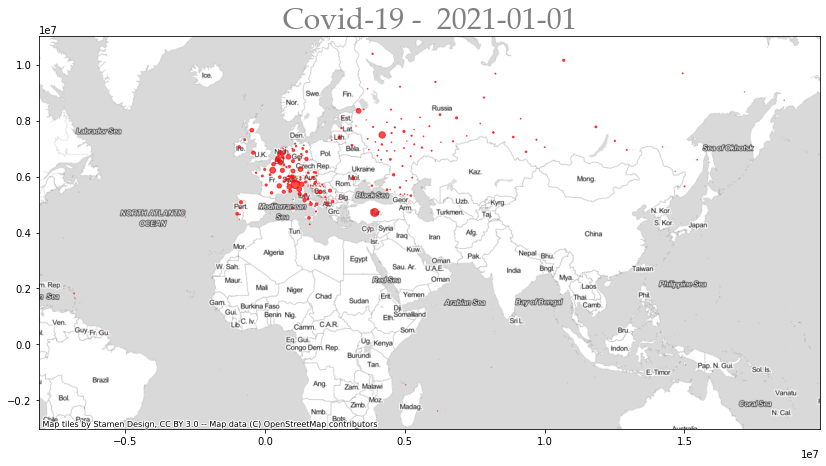

In [33]:
fig, ax = plt.subplots(figsize=(14, 12))
gdf[gdf["Date"] == '2021-01-10'].to_crs(epsg=3857).plot(ax=ax, color="red", alpha=.7,  markersize="Normalized_mean_death")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 
plt.title(" Covid-19 -  2021-01-01 ", fontsize=30, fontname="Palatino Linotype", color="grey")
#ax.axis("off")
plt.show()

## Join & Merge

In [38]:
eu_lv2 = gpd.read_file("NUTS_RG_01M_2021_4326_LEVL_2.geojson")
eu_lv2.head()

id NUTS_ID  LEVL_CODE CNTR_CODE               NAME_LATN  \
0  FRB0    FRB0          2        FR   Centre — Val de Loire   
1  CZ04    CZ04          2        CZ             Severozápad   
2  CZ07    CZ07          2        CZ          Střední Morava   
3  DK02    DK02          2        DK                Sjælland   
4  ES12    ES12          2        ES  Principado de Asturias   

                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
0   Centre — Val de Loire           0        NaN         NaN  FRB0   
1             Severozápad           0        NaN         NaN  CZ04   
2          Střední Morava           0        NaN         NaN  CZ07   
3                Sjælland           0        NaN         NaN  DK02   
4  Principado de Asturias           0        NaN         NaN  ES12   

                                            geometry  
0  POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...  
1  POLYGON ((14.49122 51.04353, 14.49945 51.04610...  
2  POLYGON ((16.90792 50.44945, 16.92475 50.43939...  
3  MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...  
4  MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...

In [53]:
eu_lv2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

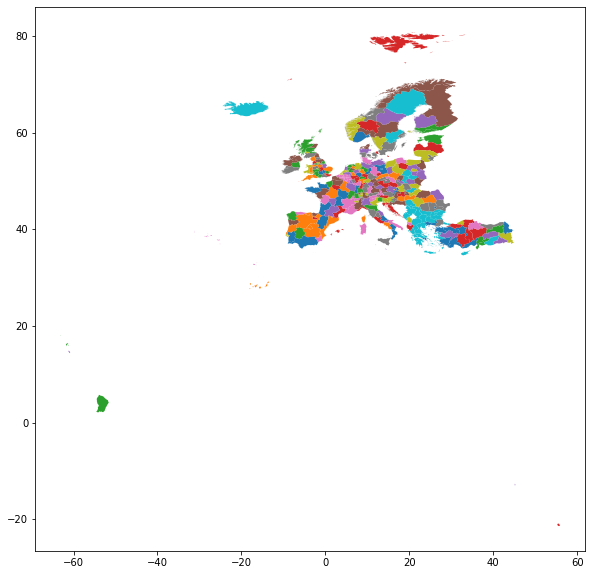

In [45]:
eu_lv2.plot("NUTS_NAME", figsize=(12,10));

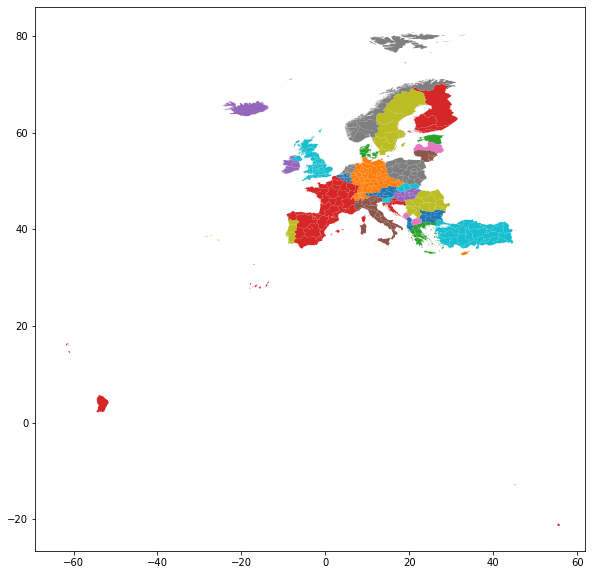

In [46]:
eu_lv2.plot("CNTR_CODE", figsize=(12,10));

In [39]:
np.setdiff1d(list(gdf.NUTS.unique()), list(eu_lv2.NUTS_ID.unique()))

array(['AD', 'AL012', 'AL013', 'AL014', 'AL015', 'AL021', 'AL022',
       'AL031', 'AL032', 'AL034', 'AL035', 'BA', 'BE1', 'BE2', 'BE3',
       'BG311', 'BG312', 'BG313', 'BG314', 'BG315', 'BG321', 'BG322',
       'BG323', 'BG325', 'BG331', 'BG332', 'BG333', 'BG341', 'BG342',
       'BG344', 'BG411', 'BG413', 'BG414', 'BG415', 'BG421', 'BG422',
       'BG423', 'BG424', 'BG425', 'BY', 'CH011', 'CH012', 'CH013',
       'CH021', 'CH022', 'CH023', 'CH024', 'CH025', 'CH031', 'CH032',
       'CH033', 'CH040', 'CH051', 'CH052', 'CH053', 'CH054', 'CH055',
       'CH056', 'CH057', 'CH061', 'CH062', 'CH063', 'CH064', 'CH065',
       'CH066', 'CY', 'DE1', 'DE2', 'DE3', 'DE4', 'DE5', 'DE6', 'DE7',
       'DE8', 'DE9', 'DEA', 'DEB', 'DEC', 'DED', 'DEE', 'DEF', 'DEG',
       'EE0', 'FI193', 'FI194', 'FI195', 'FI196', 'FI197', 'FI1B1',
       'FI1C1', 'FI1C2', 'FI1C3', 'FI1C4', 'FI1C5', 'FI1D1', 'FI1D2',
       'FI1D3', 'FI1D5', 'FI1D7', 'FI1D8', 'FI1D9', 'FI1X1', 'FI1X2',
       'FI200', 'FR1', 'FRC

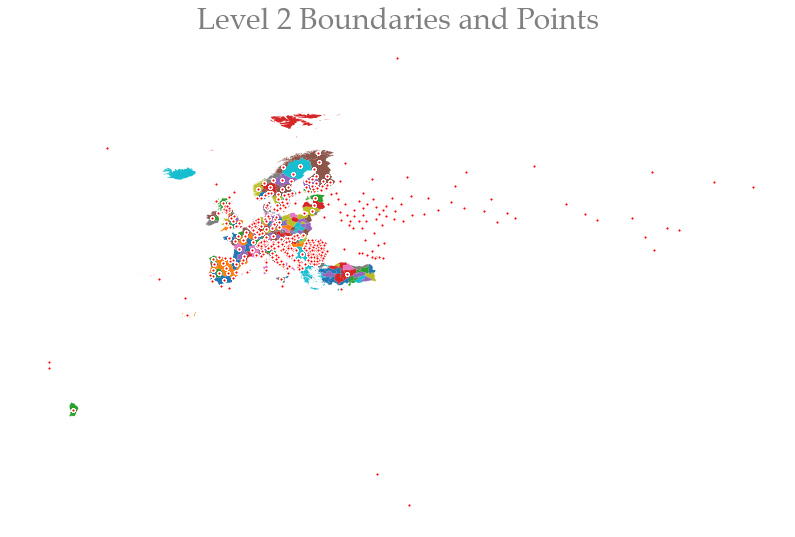

In [54]:
fig, ax = plt.subplots(figsize=(14, 12))

eu_lv2.plot("NUTS_NAME", ax=ax)
gdf.plot(ax=ax, color="red", edgecolor="white", markersize=10)
plt.title("Level 2 Boundaries and Points", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

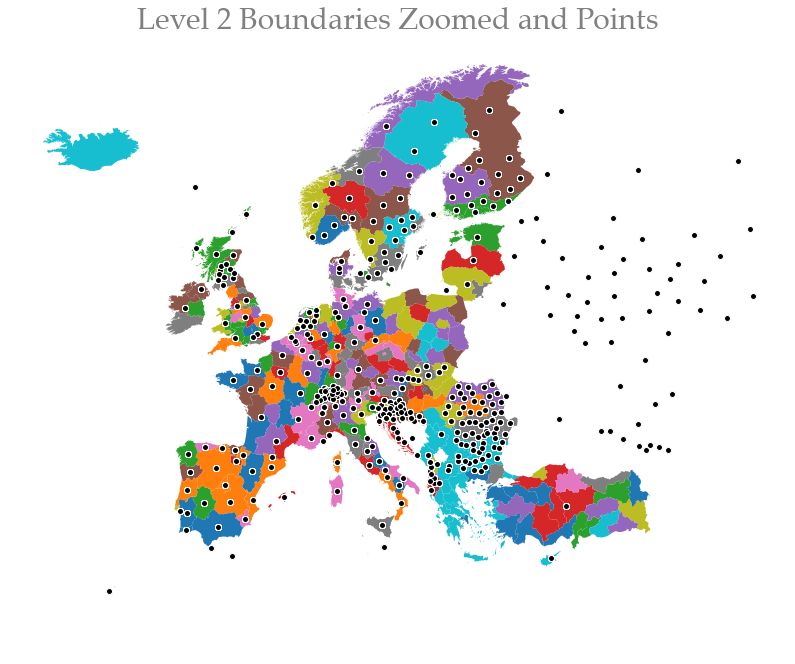

In [55]:
fig, ax = plt.subplots(figsize=(14, 12))

eu_lv2.cx[-20:60, 30:70].plot("NUTS_NAME", ax=ax)
gdf.cx[-20:60, 30:70].plot(ax=ax, color="black", edgecolor="white")
plt.title("Level 2 Boundaries Zoomed and Points", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

In [50]:
sjoined = gpd.sjoin(gdf, eu_lv2, op="within")

In [51]:
sjoined.head()

Date iso3    CountryName         Region        lat    lon  \
2   2020-01-22  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
9   2020-01-23  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
18  2020-01-24  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
28  2020-01-25  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
38  2020-01-26  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   

    CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
2                  0.0                 0.0                  0.0   
9                  0.0                 0.0                  0.0   
18                 0.0                 0.0                  0.0   
28                 0.0                 0.0                  0.0   
38                 0.0                 0.0                  0.0   

    CurrentlyPositive  ...    id  NUTS_ID  LEVL_CODE  CNTR_CODE  \
2                 0.0  ...  LI00     LI00          2         LI   
9                 0.0  ...  LI00     LI00          2         LI   
18                0.0  ...  LI00     LI00          2         LI   
28                0.0  ...  LI00     LI00          2         LI   
38                0.0  ...  LI00     LI00          2         LI   

        NAME_LATN      NUTS_NAME  MOUNT_TYPE  URBN_TYPE COAST_TYPE   FID  
2   Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
9   Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
18  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
28  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
38  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  

[5 rows x 28 columns]

In [52]:
sjoined.head().T

2                        9   \
Date                                2020-01-22               2020-01-23   
iso3                                       LIE                      LIE   
CountryName                      Liechtenstein            Liechtenstein   
Region                           Liechtenstein            Liechtenstein   
lat                                  47.164696                47.164696   
lon                                   9.555000                 9.555000   
CumulativePositive                    0.000000                 0.000000   
CumulativeDeceased                    0.000000                 0.000000   
CumulativeRecovered                   0.000000                 0.000000   
CurrentlyPositive                     0.000000                 0.000000   
Hospitalized                               NaN                      NaN   
IntensiveCare                              NaN                      NaN   
EUcountry                                False                    False   
EUCPMcountry                             False                    False   
NUTS                                        LI                       LI   
geometry               POINT (9.555 47.164696)  POINT (9.555 47.164696)   
Normalized_mean_death                 0.000000                 0.000000   
index_right                                162                      162   
id                                        LI00                     LI00   
NUTS_ID                                   LI00                     LI00   
LEVL_CODE                                    2                        2   
CNTR_CODE                                   LI                       LI   
NAME_LATN                        Liechtenstein            Liechtenstein   
NUTS_NAME                        Liechtenstein            Liechtenstein   
MOUNT_TYPE                                   0                        0   
URBN_TYPE                                  NaN                      NaN   
COAST_TYPE                                 NaN                      NaN   
FID                                       LI00                     LI00   

                                            18                       28  \
Date                                2020-01-24               2020-01-25   
iso3                                       LIE                      LIE   
CountryName                      Liechtenstein            Liechtenstein   
Region                           Liechtenstein            Liechtenstein   
lat                                  47.164696                47.164696   
lon                                   9.555000                 9.555000   
CumulativePositive                    0.000000                 0.000000   
CumulativeDeceased                    0.000000                 0.000000   
CumulativeRecovered                   0.000000                 0.000000   
CurrentlyPositive                     0.000000                 0.000000   
Hospitalized                               NaN                      NaN   
IntensiveCare                              NaN                      NaN   
EUcountry                                False                    False   
EUCPMcountry                             False                    False   
NUTS                                        LI                       LI   
geometry               POINT (9.555 47.164696)  POINT (9.555 47.164696)   
Normalized_mean_death                 0.000000                 0.000000   
index_right                                162                      162   
id                                        LI00                     LI00   
NUTS_ID                                   LI00                     LI00   
LEVL_CODE                                    2                        2   
CNTR_CODE                                   LI                       LI   
NAME_LATN                        Liechtenstein            Liechtenstein   
NUTS_NAME                        Liechtenstein            Liechtenst

In [56]:
sjoined_to_merge = sjoined[["Date", "CumulativePositive", "CumulativeDeceased", "CumulativeRecovered", "NUTS_ID"]]

In [57]:
sjoined_to_merge[sjoined["NUTS_NAME"] == "Abruzzo"]

Date  CumulativePositive  CumulativeDeceased  \
409     2020-02-27                 1.0                 0.0   
454     2020-02-28                 1.0                 0.0   
506     2020-02-29                 2.0                 0.0   
580     2020-03-01                 5.0                 0.0   
672     2020-03-02                 5.0                 0.0   
...            ...                 ...                 ...   
131465  2021-01-24             40889.0              1393.0   
131856  2021-01-25             40955.0              1418.0   
132303  2021-01-26             41107.0              1435.0   
132748  2021-01-27             41450.0              1441.0   
133157  2021-01-28             41718.0              1446.0   

        CumulativeRecovered NUTS_ID  
409                     0.0    ITF1  
454                     0.0    ITF1  
506                     0.0    ITF1  
580                     0.0    ITF1  
672                     0.0    ITF1  
...                     ...     ...  
131465              28842.0    ITF1  
131856              29341.0    ITF1  
132303              29625.0    ITF1  
132748              29933.0    ITF1  
133157              30206.0    ITF1  

[337 rows x 5 columns]

In [58]:
sjoined_to_merge[sjoined_to_merge["Date"] == "2021-01-26"]

Date  CumulativePositive  CumulativeDeceased  \
132325  2021-01-26              2455.0                52.0   
132555  2021-01-26              2455.0                52.0   
132344  2021-01-26             91161.0              2812.0   
132492  2021-01-26            387206.0              3924.0   
132272  2021-01-26                 0.0             13153.0   
...            ...                 ...                 ...   
132385  2021-01-26              5614.0                 NaN   
132392  2021-01-26              5494.0                 NaN   
132396  2021-01-26             10421.0                 NaN   
132405  2021-01-26             10899.0                 NaN   
132331  2021-01-26             59262.0               777.0   

        CumulativeRecovered NUTS_ID  
132325               2322.0    LI00  
132555               2322.0    LI00  
132344              79621.0    MK00  
132492                  0.0    RS21  
132272              58777.0    FR10  
...                     ...     ...  
132385                  NaN    RO41  
132392                  NaN    RO41  
132396                  NaN    RO41  
132405                  NaN    RO41  
132331                  NaN    ME00  

[330 rows x 5 columns]

In [139]:
merged_gdf = pd.merge(eu_lv2,sjoined_to_merge[sjoined_to_merge["Date"] == "2021-01-26"], on="NUTS_ID", how="inner")
#eu_lv2.merge(sjoined_to_merge[sjoined_to_merge["Date"] == "2021-01-26"], on="NUTS_ID", how="left")
merged_gdf.head()

id NUTS_ID  LEVL_CODE CNTR_CODE               NAME_LATN  \
0  FRB0    FRB0          2        FR   Centre — Val de Loire   
1  DK02    DK02          2        DK                Sjælland   
2  ES12    ES12          2        ES  Principado de Asturias   
3  AL01    AL01          2        AL                    Veri   
4  AL01    AL01          2        AL                    Veri   

                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
0   Centre — Val de Loire           0        NaN         NaN  FRB0   
1                Sjælland           0        NaN         NaN  DK02   
2  Principado de Asturias           0        NaN         NaN  ES12   
3                    Veri           0        NaN         NaN  AL01   
4                    Veri           0        NaN         NaN  AL01   

                                            geometry        Date  \
0  POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...  2021-01-26   
1  MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...  2021-01-26   
2  MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...  2021-01-26   
3  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   
4  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  
0                 0.0              1603.0               6351.0  
1                 NaN                 NaN                  NaN  
2             34214.0              1475.0                  NaN  
3              6036.0               138.0               4399.0  
4              1678.0                30.0               1228.0

In [140]:
merged_gdf.shape, eu_lv2.shape

((330, 15), (334, 11))

<AxesSubplot:>

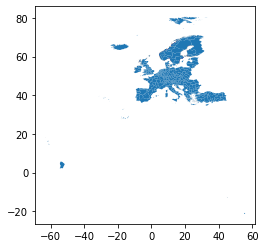

In [141]:
eu_lv2.plot()

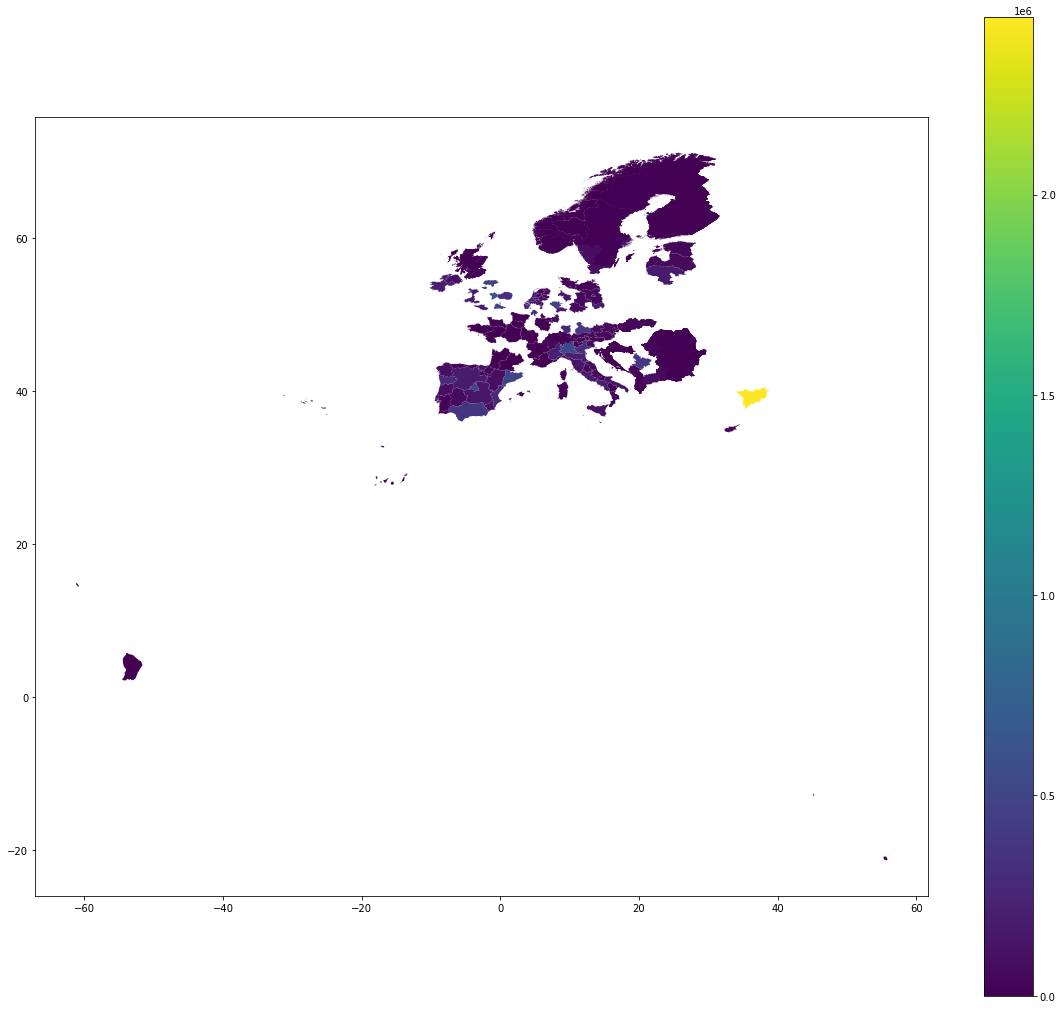

In [142]:
merged_gdf.plot("CumulativePositive", legend=True, figsize=(20,18));

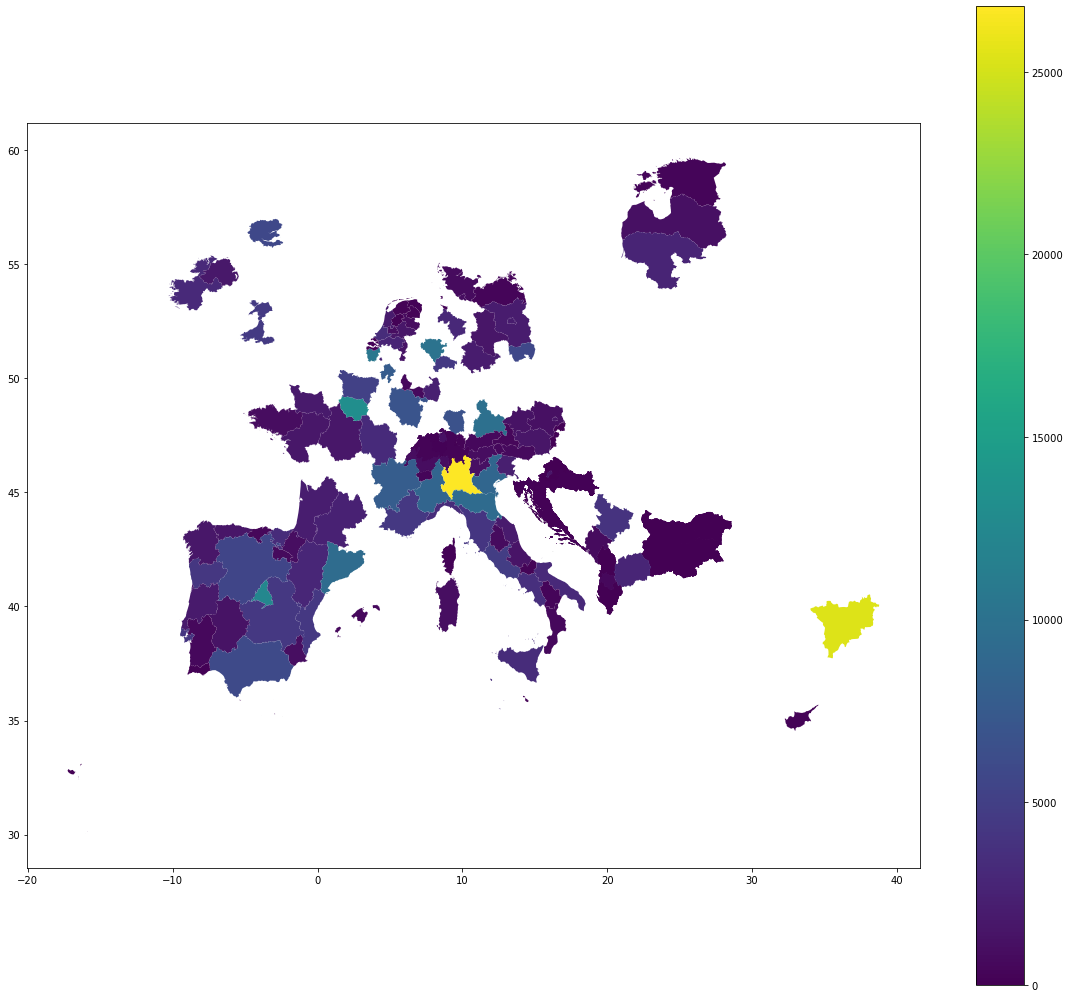

In [143]:
merged_gdf.cx[-20:60, 30:70].plot("CumulativeDeceased", legend=True, figsize=(20,18), legend_kwds={'format':"%.0f"});

## Choropleth Map

In [144]:
merged_gdf["CumulativePositive"].min(), merged_gdf["CumulativeDeceased"].max()

(0.0, 26789.0)

In [145]:
population = pd.read_csv("population_data.csv")
population.head()

codes                                             labels      2019
0    BE                                            Belgium  11455519
1   BE1  Région de Bruxelles-Capitale/Brussels Hoofdste...   1215290
2  BE10  Région de Bruxelles-Capitale/Brussels Hoofdste...   1215290
3   BE2                                      Vlaams Gewest   6596233
4  BE21                                    Prov. Antwerpen   1860470

In [146]:
merged_gdf.head()

id NUTS_ID  LEVL_CODE CNTR_CODE               NAME_LATN  \
0  FRB0    FRB0          2        FR   Centre — Val de Loire   
1  DK02    DK02          2        DK                Sjælland   
2  ES12    ES12          2        ES  Principado de Asturias   
3  AL01    AL01          2        AL                    Veri   
4  AL01    AL01          2        AL                    Veri   

                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
0   Centre — Val de Loire           0        NaN         NaN  FRB0   
1                Sjælland           0        NaN         NaN  DK02   
2  Principado de Asturias           0        NaN         NaN  ES12   
3                    Veri           0        NaN         NaN  AL01   
4                    Veri           0        NaN         NaN  AL01   

                                            geometry        Date  \
0  POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...  2021-01-26   
1  MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...  2021-01-26   
2  MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...  2021-01-26   
3  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   
4  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered  
0                 0.0              1603.0               6351.0  
1                 NaN                 NaN                  NaN  
2             34214.0              1475.0                  NaN  
3              6036.0               138.0               4399.0  
4              1678.0                30.0               1228.0

In [157]:
merged_population = merged_gdf.merge(population, left_on="NUTS_ID", right_on="codes", how="left")

In [158]:
merged_population.shape

(330, 18)

In [164]:
merged_population['CumulativeDeceased'] = merged_population['CumulativeDeceased'].fillna(0)

In [165]:
merged_population["normalized_deceased"] = (merged_population["CumulativeDeceased"] / merged_population["2019"].astype("float")) * 100

In [166]:
merged_population.head()

id NUTS_ID  LEVL_CODE CNTR_CODE               NAME_LATN  \
0  FRB0    FRB0          2        FR   Centre — Val de Loire   
1  DK02    DK02          2        DK                Sjælland   
2  ES12    ES12          2        ES  Principado de Asturias   
3  AL01    AL01          2        AL                    Veri   
4  AL01    AL01          2        AL                    Veri   

                NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
0   Centre — Val de Loire           0        NaN         NaN  FRB0   
1                Sjælland           0        NaN         NaN  DK02   
2  Principado de Asturias           0        NaN         NaN  ES12   
3                    Veri           0        NaN         NaN  AL01   
4                    Veri           0        NaN         NaN  AL01   

                                            geometry        Date  \
0  POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...  2021-01-26   
1  MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...  2021-01-26   
2  MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43...  2021-01-26   
3  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   
4  POLYGON ((19.83100 42.46645, 19.83568 42.47103...  2021-01-26   

   CumulativePositive  CumulativeDeceased  CumulativeRecovered codes  \
0                 0.0              1603.0               6351.0  FRB0   
1                 NaN                 0.0                  NaN  DK02   
2             34214.0              1475.0                  NaN  ES12   
3              6036.0               138.0               4399.0  AL01   
4              1678.0                30.0               1228.0  AL01   

                   labels       2019  normalized_deceased  
0   Centre - Val de Loire  2565258.0             0.062489  
1                Sjælland   836738.0             0.000000  
2  Principado de Asturias  1022205.0             0.144296  
3                    Veri   813758.0             0.016958  
4                    Veri   813758.0             0.003687

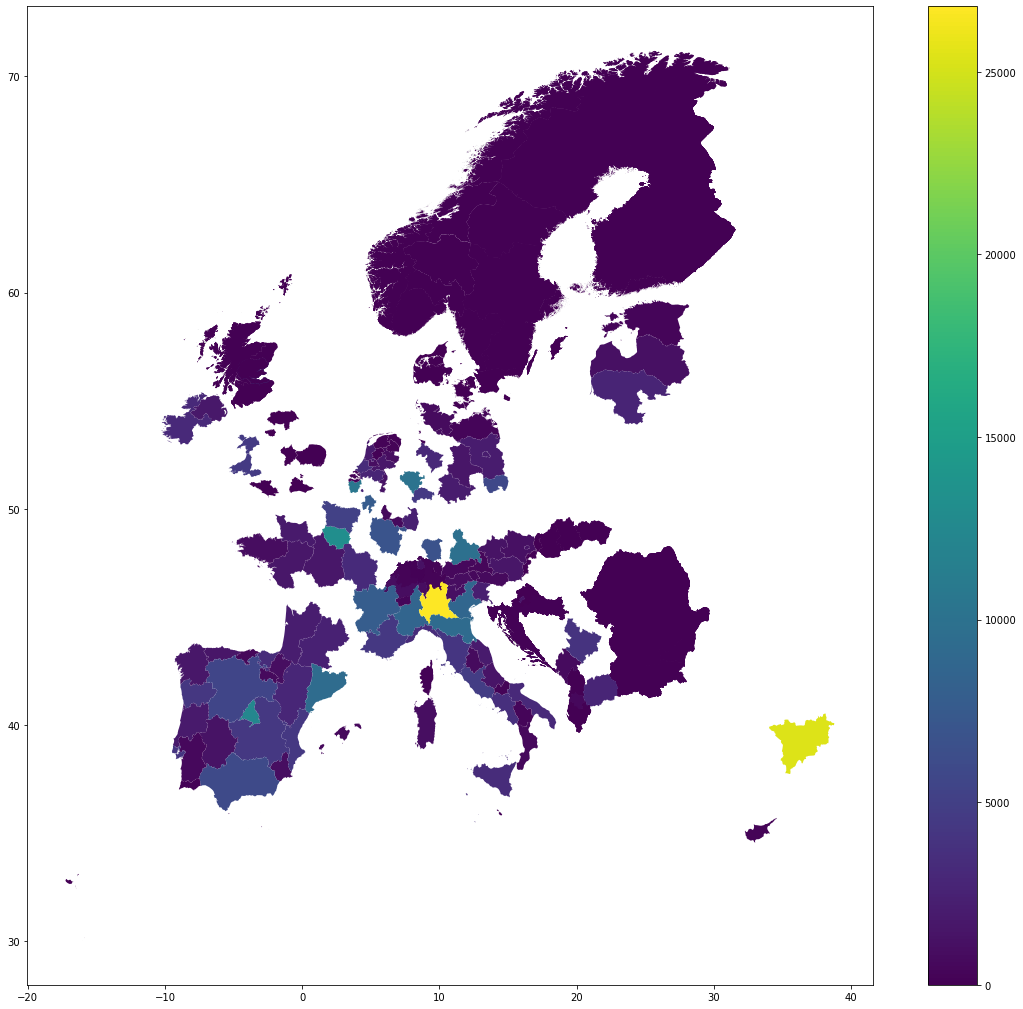

In [168]:
merged_population.cx[-20:60, 30:70].plot("CumulativeDeceased", legend=True, figsize=(20,18), legend_kwds={'format':"%.0f"});

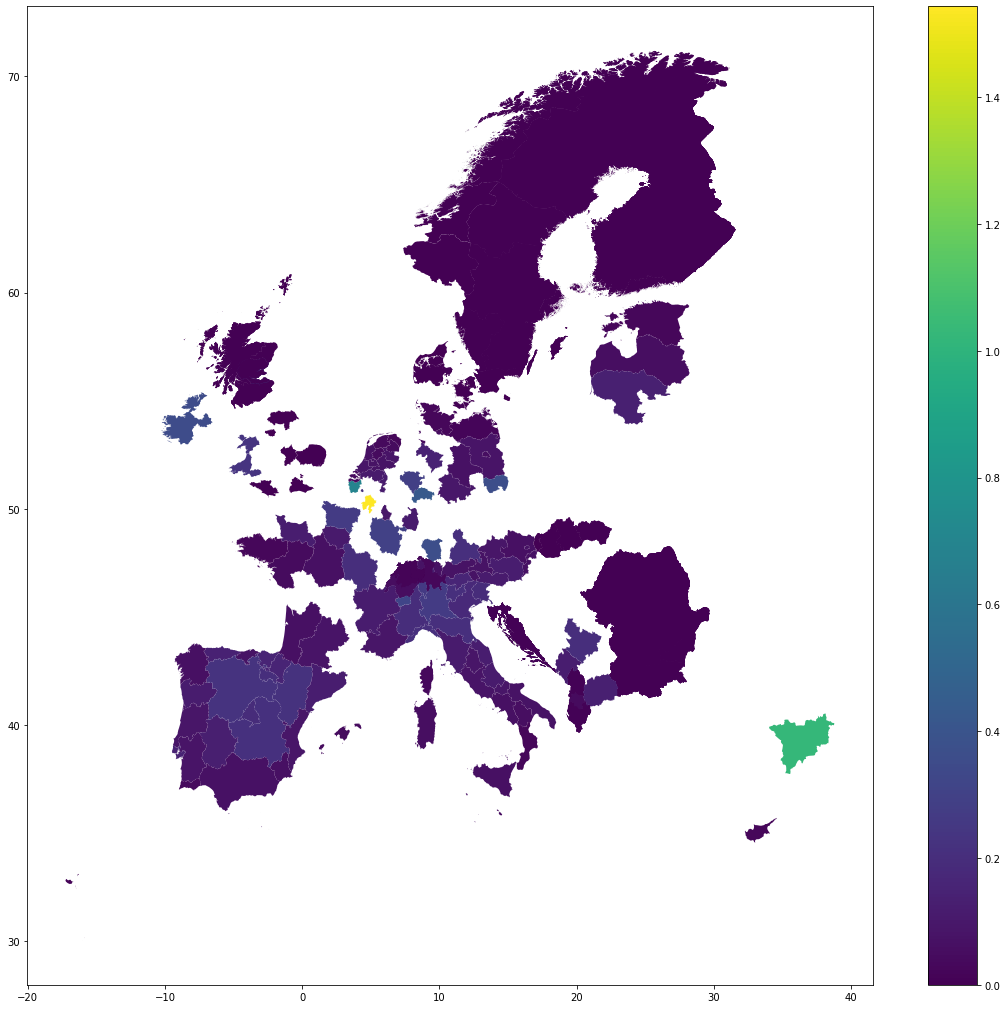

In [169]:
merged_population.cx[-20:60, 30:70].plot("normalized_deceased", legend=True, figsize=(20,18));

## Interactive 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
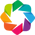

In [173]:
import pandas as pd
import holoviews as hv

from bokeh.sampledata import stocks
from holoviews.operation.timeseries import rolling, rolling_outlier_std

hv.extension('bokeh')

In [176]:
sjoined.head()

Date iso3    CountryName         Region        lat    lon  \
2   2020-01-22  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
9   2020-01-23  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
18  2020-01-24  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
28  2020-01-25  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   
38  2020-01-26  LIE  Liechtenstein  Liechtenstein  47.164696  9.555   

    CumulativePositive  CumulativeDeceased  CumulativeRecovered  \
2                  0.0                 0.0                  0.0   
9                  0.0                 0.0                  0.0   
18                 0.0                 0.0                  0.0   
28                 0.0                 0.0                  0.0   
38                 0.0                 0.0                  0.0   

    CurrentlyPositive  ...    id  NUTS_ID  LEVL_CODE  CNTR_CODE  \
2                 0.0  ...  LI00     LI00          2         LI   
9                 0.0  ...  LI00     LI00          2         LI   
18                0.0  ...  LI00     LI00          2         LI   
28                0.0  ...  LI00     LI00          2         LI   
38                0.0  ...  LI00     LI00          2         LI   

        NAME_LATN      NUTS_NAME  MOUNT_TYPE  URBN_TYPE COAST_TYPE   FID  
2   Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
9   Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
18  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
28  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  
38  Liechtenstein  Liechtenstein           0        NaN        NaN  LI00  

[5 rows x 28 columns]

In [180]:
sample_dates = list(sjoined.Date.sample(10))

In [183]:
def get_date(symbol, **kwargs):
    gdf = sjoined
    return gdf.hvplot(geo=True, color="red",  tiles="ESRI")

In [184]:
dmap = hv.DynamicMap(get_date, kdims='Symbol').redim.values(Symbol=sample_dates)

In [185]:
dmap

Invoked as get_date(symbol='2020-12-05')
Invoked as dynamic_operation('2020-12-05')


AttributeError: 'GeoDataFrame' object has no attribute 'hvplot'

:DynamicMap   [Symbol]

In [174]:
def load_symbol(symbol, **kwargs):
    df = pd.DataFrame(getattr(stocks, symbol))
    df['date'] = df.date.astype('datetime64[ns]')
    return hv.Curve(df, ('date', 'Date'), ('adj_close', 'Adjusted Close'))

stock_symbols = ['AAPL', 'FB', 'GOOG', 'IBM', 'MSFT']
dmap = hv.DynamicMap(load_symbol, kdims='Symbol').redim.values(Symbol=stock_symbols)

In [175]:
dmap

:DynamicMap   [Symbol]
   :Curve   [date]   (adj_close)